In [ ]:
Kelompok 7 (Mentor Kak Erwin)
* Mohammad Rizky
* Evrida Indra 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Customer churn didefinisikan sebagai kecenderungan pelanggan untuk menghentikan kontak dengan perusahaan atau dengan kata lain 
proses dimana pelanggan mengganti pembeliannya ke perusahaan lain. Churn dapat menyebabkan hilangnya pendapatan bahkan masalah
sosial bagi perusahaan. terdapat beberapa faktor yang dapat menyebabkan pelanggan melakukan churn yaitu 
1. harga layanan 
harga layanan adalah uang yang harus dikeluarkan untuk mendapatkan suatu layanan. tentunya pelanggan menginginkan harga layanan 
yang murah dengan kualitas yang baik.harga layanan yg tinggi dapat menyebabkan tingginya jumlah pelanggan yang berpaling dari 
layanan perusahaan kita. perusahaan juga perlu untuk mengetahui harga dari penyedia jasa layanan lain untuk menentukan harga standar.
2. Kecanggihan teknologi dari perusahaan lawan
perusahaan yang memiliki kecanggihan teknologi pasti lebih menguntungkan bagi pelanggan. dalam hal ini kecepatan internet dapat berpengaruh terhadap jumlah pelanggan yang churn.
3. Kepuasan pelanggan
kepuasan pelanggan dapat dikatakan sukses apabila layanan yang diberikan sesuai dengan harapan dari pelanggan. 
4. Keamanan 
kemanan yang dimaksudkan adalah data-data milik pelanggan yang diserahkan kepada perusahaan akan tetap terjaga
5. Iklan
Iklan tidak hanya bertujuan untuk menatik pelanggan tetapi juga dimanfaatkan untuk membangun kepercayaan antara perusahaan dengan 
pelanggan. maka iklan yang baik dapat menarik pelanggan yang setia dan mencegah pelanggan churn.

In [3]:
df = pd.read_csv(r"telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


Pada dataset telecom churn terdapat 11 kolom yaitu
1. Churn = Pelanggan yang berhenti berlangganan, dengan 1 jika berhenti dan 0 jika tidak
2. AccountWeeks = lama berlangganan (dalam satuan minggu)
3. ContractRenewal = Pembaruan kontrak (1 jika memperbarui, 0 jika tidak)
4. DataPlan = paket data (1 jika punya 0 jika tidak)
5. DataUsage = penggunaan data (dalam gigabytes)
6. CustServCalls = jumlah pelanggan menghubungi customer service
7. DayMins = rata-rata menit penggunaan per bulan
8. DayCall = rata-rata penggunaan telepon
9. MonthlyCharge = rata-rata tagihan perbulan
10. OverageFee = biaya kelebihan dalam 12 bulan terakhir
11. RoamMins = rata-rata telepon roaming

Data sudah sesuai dengan tipe data juga tidak ada yg kosong

Pengecekan Outliers

In [5]:
df[(np.abs(stats.zscore(df["Churn"])) >= 3)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


In [6]:
#Z-Score
df_clean = df[(np.abs(stats.zscore(df["Churn"])) < 3)]
df_clean

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


Berdasarkan pengcekan outliers tersebut, diketahui tidak ada outliers sehingga data tetap sama seperti semula

### Visualisasi

In [7]:
def countplot(data, title, title_x, annotate_x, palette):
    
    '''
    : param data: categorical data.
    : param title: chart title.
    : param title_x: title location by x.
    : param annotate_x: annotate location by x.
    : param palette: colors.
    : return bar chart   
    '''
    
    fig = plt.figure(figsize = (8, 4))

    ax = fig.add_axes([0, 0, 1, 1])

    sns.countplot(
        y = data,
        palette = palette,
        order = data.value_counts().index,
        edgecolor = 'black',
        lw = 2)

    sns.despine(bottom = True)

    plt.xticks([])
    plt.yticks(
        fontsize = 15,
        color = 'black',
        family = 'sans-serif')

    plt.xlabel('')
    plt.ylabel('')

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}'.format(width), (annotate_x + width, y + height*0.5), ha='center', fontsize=15, color='black', family='sans-serif')

    plt.title(
        label = title,
        fontsize = 20,
        x = title_x,
        y = 1.1,
        family = 'sans-serif',
        fontweight='bold')    

    plt.legend([]).set_visible(False)
    
    plt.show()

In [10]:
def stack_hist(categorial_data, data, palette, x_label, title, title_x):
    
    '''
    : param categorial_data: categorical data.
    : param data: numeric data.
    : param palette: colors.
    : param x_label: x_label name.
    : param title: chart title.
    : param title_x: title location by x.
    : return stacked histogram   
    '''
    
    plt.figure(figsize = (13, 6))

    sns.histplot(
        x=data,
        hue=categorial_data.astype('str'),
        palette=palette,
        multiple='stack',
        edgecolor='black')

    sns.despine()

    plt.xticks(
        fontsize=15,
        color='black',
        family='sans-serif')
    plt.yticks(
        fontsize=15,
        color='black',
        family='sans-serif')

    plt.xlabel(
        xlabel=x_label,
        fontsize=17,
        color='black',
        family='sans-serif',
        fontweight='bold')
    plt.ylabel(
        ylabel='Count',
        fontsize=17,
        color='black',
        family='sans-serif',
        fontweight='bold')

    plt.title(
        label=title,
        fontsize=20,
        x=title_x,
        y=1.1,
        family='sans-serif',
        fontweight='bold')
    
    plt.legend(labels=['Churn','Not Churn'])

    plt.show()

1. Jumlah pelanggan yg churn

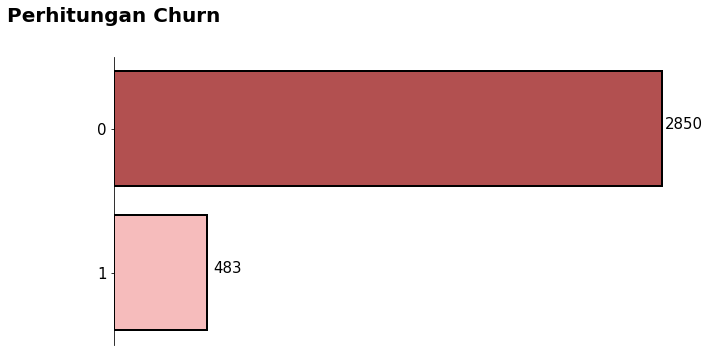

Churn percentage - 14.49%


In [57]:
countplot(
    data=df['Churn'],
    title='Perhitungan Churn',
    title_x=0,
    annotate_x=110,
    palette=['#c24040', '#ffb3b3'])

print(f"Churn percentage - {round(len(df[df['Churn']==1]) / len(df)*100, 2)}%")

Dari 3333 pelanggan terdapat 14,49% pelanggan churned atau sekitar 483 pelanggan. Hal ini cenderung cukup sedikit dibandingkan 
dengan jumlah pelanggan yang ada.

2. Hubungan Lama berlanggan dengan churn

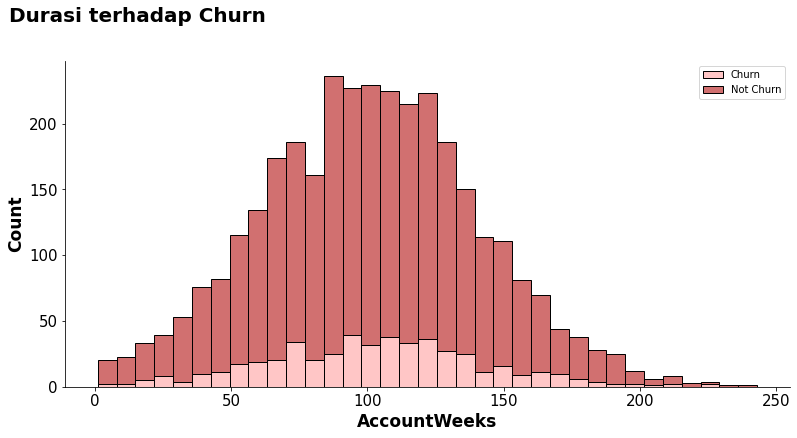

AccountWeeks mean (No Churn) - 101
AccountWeeks mean (Churn) - 103

std (No Churn) - 40
std (Churn) - 39



In [62]:
stack_hist(
    categorial_data=df['Churn'],
    data=df['AccountWeeks'],
    palette=['#c24040', '#ffb3b3'],
    x_label='AccountWeeks',
    title='Durasi terhadap Churn',
    title_x=0.1
    )

print(f'''AccountWeeks mean (No Churn) - {round(df[df['Churn']==0]['AccountWeeks'].mean())}
AccountWeeks mean (Churn) - {round(df[df['Churn']==1]['AccountWeeks'].mean())}''')
print()
print(f'''std (No Churn) - {round(df[df['Churn']==0]['AccountWeeks'].std())}
std (Churn) - {round(df[df['Churn']==1]['AccountWeeks'].std())}''')
print()

Berdasarkan visualisasi tersebut, pengguna dengan lama berlangganan 103 minggu melakukan churn, dan 101 minggu tidak churn, 
sehingga dapat dikatakan lama berlangganan tidak dapat menjamin pelanggan churn atau tidak. 

Pelanggan dengan tingkat churn terbanyak adalah dengan durasi berlangganan sekitar 100 minggu
pelanggan dengan tingkat tidak churn terbanyak adalah dengan durasi kurang dari 100 minggu

3. Hubungan Penggunaan Data terhadap Churn

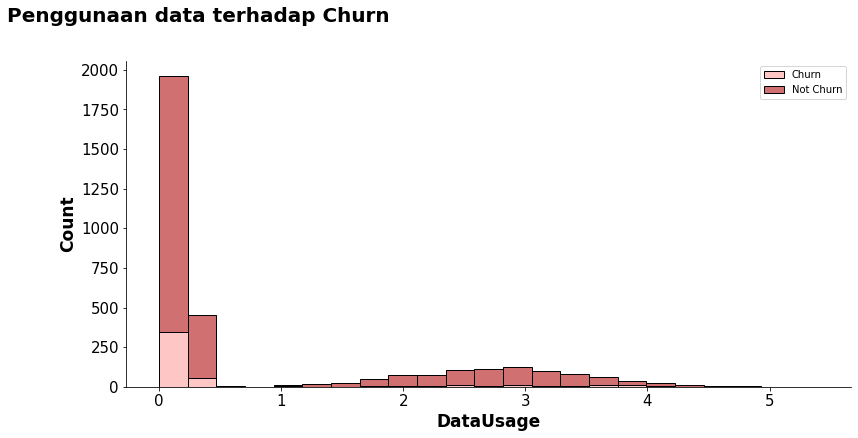

Average datause (No Churn) - 0.86
Average datause (Churn) - 0.55



In [19]:
stack_hist(
    categorial_data=df['Churn'],
    data=df['DataUsage'],
    palette=['#c24040', '#ffb3b3'],
    x_label='DataUsage',
    title='Penggunaan data terhadap Churn',
    title_x=0.1
    )
print(f'''Average datause (No Churn) - {round(df[df['Churn']==0]['DataUsage'].mean(), 2)}
Average datause (Churn) - {round(df[df['Churn']==1]['DataUsage'].mean(), 2)}''')
print()

Rata-rata penggunaan data dari pelanggan yang Churn adalah sekitar kurang dari 1 GB tetapi lebih dari 0,5 GB sedangkan pelanggan
yang Churn penggunaan datanya sekitar 0,55 GB atau cenderung lebih sedikit dengan selisih yang cukup banyak.

4. Hubungan Pembaruan Kontrak, Penggunaan Paket data, Cust Service Call terhadap Churn

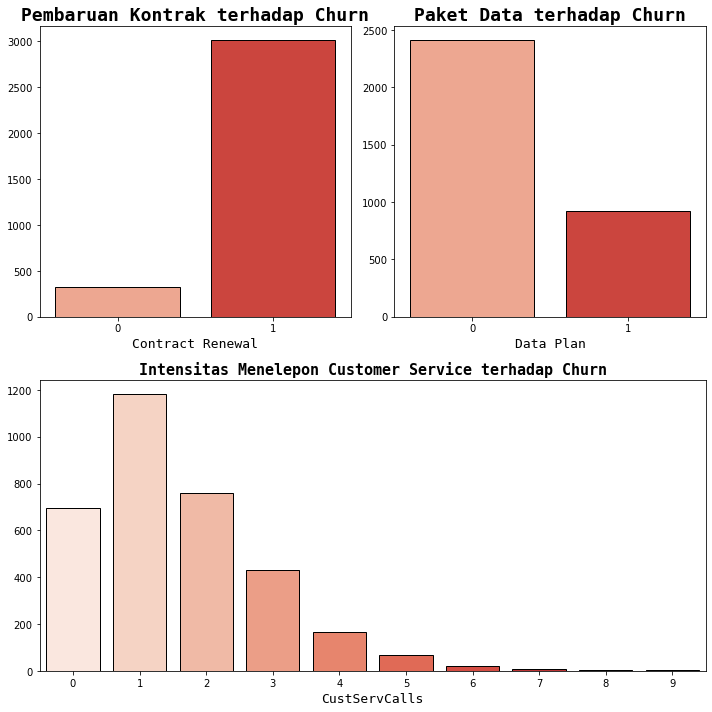

In [16]:
ax = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = df , x = "ContractRenewal" , palette="Reds", edgecolor='k')
plt.title("Pembaruan Kontrak terhadap Churn" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("Contract Renewal", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('')
plt.subplot(2,2,2)
sns.countplot(data = df , x = "DataPlan" , palette="Reds", edgecolor='k')
plt.title("Paket Data terhadap Churn" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("Data Plan", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('')
plt.subplot(2,2,(3,4))
sns.countplot(data = df , x = "CustServCalls" , palette="Reds", edgecolor='k')
plt.title("Intensitas Menelepon Customer Service terhadap Churn" , size=15, fontweight='bold', fontfamily='monospace')
plt.xlabel("CustServCalls", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('')
plt.tight_layout()
plt.show()

* Terdapat sekitar 400 pelanggan yang tidak memperbarui kontrak yang diindikasikan melakukan Churn dan sekitar 3000 yang memperbarui kontrak.
* Terdapat 2250 yang tidak memiliki paket data dan sekitar 700 pelanggan yang memiliki paket data
* Pelanggan paling banyak menghubungi Customer Service sekitar 1-3 kali, sedikit pelanggan yang menghubungi Cust Service lebih dari 5 kali

5. Day Mins dan Day Call

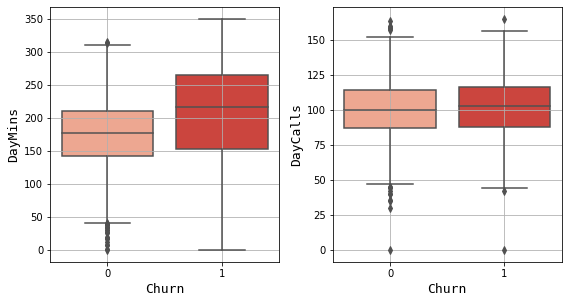

In [123]:
ax = plt.figure(figsize=(8,8))
sns.boxplot(data = df , y = "DataUsage" ,  x = "Churn" , palette="Reds")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("DataUsage",size=13, fontweight='light', fontfamily='monospace')
plt.subplot(2,2,3)
sns.boxplot(data = df , y = "DayMins" , x = "Churn" , palette="Reds")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("DayMins",size=13, fontweight='light', fontfamily='monospace')
plt.subplot(2,2,4)
sns.boxplot(data = df , y = "DayCalls" , x = "Churn" , palette="Reds")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("DayCalls",size=13, fontweight='light', fontfamily='monospace')
plt.tight_layout()
plt.show()

* Rata-rata pelanggan yang Churn melakukan panggilan per menit lebih sedikit daripada pelanggan yang tidak Churn. Dengan rata-rata 
sekitar 175 menit sedangkan pelanggan tidak Churn melakukan panggilan sekitar 225 menit, dari hal tersebut dapat diketahui bahwa 
perbedaan jaraknya cukup signifikan.
* Sedangkan rata-rata pelanggan yang Churn memiliki jumlah panggilan per hari yaitu seratus, dengan pelanggan yang tidak Churn 
sekitar 105 orang, hal ini menunjukkan perbedaan yang tidak begitu signifikan.

6.  Monthly Charge

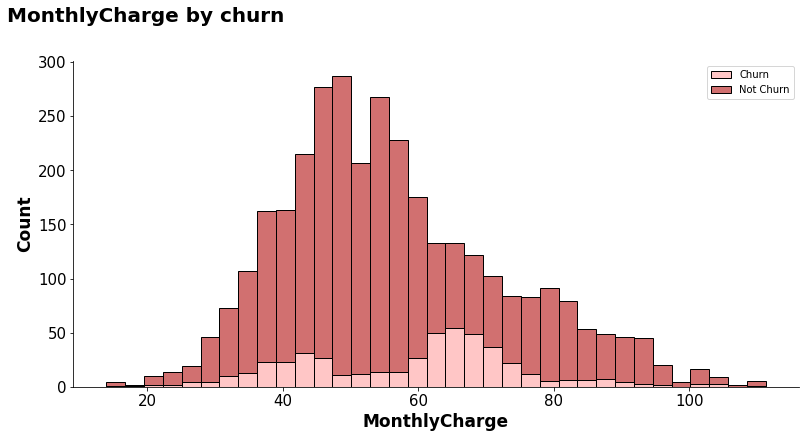

Average monthlycharge (No Churn) - 55.82
Average monthlycharge (Churn) - 59.19

std monthlycharge (No Churn) - 16
std monthlycharge (Churn) - 16



In [124]:
stack_hist(
    categorial_data=df['Churn'],
    data=df['MonthlyCharge'],
    palette=['#c24040', '#ffb3b3'],
    x_label='MonthlyCharge',
    title='MonthlyCharge by churn',
    title_x=0.1
    )
print(f'''Average monthlycharge (No Churn) - {round(df[df['Churn']==0]['MonthlyCharge'].mean(), 2)}
Average monthlycharge (Churn) - {round(df[df['Churn']==1]['MonthlyCharge'].mean(), 2)}''')
print()
print(f'''std monthlycharge (No Churn) - {round(df[df['Churn']==0]['MonthlyCharge'].std())}
std monthlycharge (Churn) - {round(df[df['Churn']==1]['MonthlyCharge'].std())}''')
print()

Dari grafik dapat terlihat bahwa pelanggan yang Churn membayar tagihan lebih mahal daripada yang tidak churn. Hal ini dapat 
menjadi alasan pelanggan Churn.

7. Overage fee

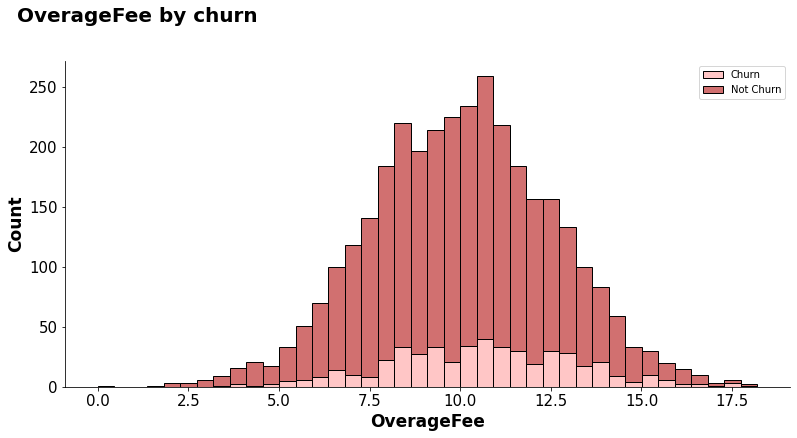

Average overagefee (No Churn) - 9.95
Average overagefee (Churn) - 10.62

std overagefee (No Churn) - 2.51
std overagefee (Churn) - 2.59



In [22]:
stack_hist(
    categorial_data=df['Churn'],
    data=df['OverageFee'],
    palette=['#c24040', '#ffb3b3'],
    x_label='OverageFee',
    title='OverageFee by churn',
    title_x=0.1
    )
print(f'''Average overagefee (No Churn) - {round(df[df['Churn']==0]['OverageFee'].mean(), 2)}
Average overagefee (Churn) - {round(df[df['Churn']==1]['OverageFee'].mean(), 2)}''')
print()
print(f'''std overagefee (No Churn) - {round(df[df['Churn']==0]['OverageFee'].std(), 2)}
std overagefee (Churn) - {round(df[df['Churn']==1]['OverageFee'].std(), 2)}''')
print()

Rata-rata pengguna yg Churn memiliki overpayment yg cukup besar 

8. Roam mins

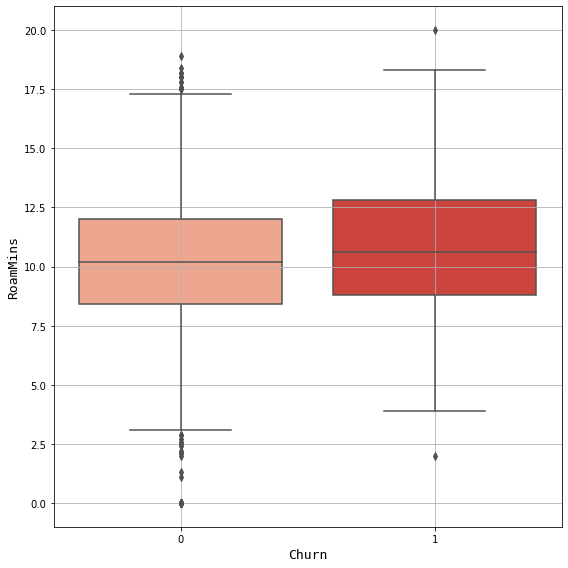

In [15]:
ax = plt.figure(figsize=(8,8))
sns.boxplot(data = df , y = "RoamMins" , x = "Churn" , palette="Reds")
plt.grid(True)
plt.xlabel("Churn",size=13, fontweight='light', fontfamily='monospace')
plt.ylabel("RoamMins",size=13, fontweight='light', fontfamily='monospace')
plt.tight_layout()
plt.show()

Rata-rata pengguna yang Churn lebih banyak melakukan Roammins daripada yang tidak churn dengan selisih yang relatif sedikit

### Pemodelan

In [30]:
# Menentukan X dan y
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [31]:
# Memisahkan X dan y menjadi data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

1. Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
#Evaluasi dengan Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1136
           1       0.40      0.14      0.20       198

    accuracy                           0.84      1334
   macro avg       0.63      0.55      0.56      1334
weighted avg       0.80      0.84      0.81      1334



In [75]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))

[[1096   40]
 [ 171   27]]


(TN) True Negatives = 1096
(FP) False Positives = 40
(FN) False Negatives = 171
(TP) True Positives = 27

In [34]:
#Evaluasi dengan AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) 
print(auc(fpr, tpr))

0.5505761843790012


* Dari classification report dapat dilihat bahwa model memiliki rata-rata sekitar  mulai dari precision, recall, f1-score, dan support. Accuracy juga menunjukan akurasi 84%.
* Untuk score AUC dapat dilihat bahwa nilainya sekitar 55,1%

Hyperparameter Tuning

In [35]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

In [36]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

In [37]:
lr = LogisticRegression()

In [38]:
#cv itu cross validation
clf = GridSearchCV(lr, hyperparameters, cv=10)

In [39]:
best_model = clf.fit(X,y)

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\rizky\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [40]:
#Nilai hyperpaameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.0006951927961775605


In [41]:
y_pred = best_model.predict(X_test)

In [73]:
print(confusion_matrix(y_test, y_pred))

[[1136    0]
 [ 196    2]]


(TN) True Negatives = 1136
(FP) False Positives = 0
(FN) False Negatives = 196
(TP) True Positives = 2

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1136
           1       1.00      0.01      0.02       198

    accuracy                           0.85      1334
   macro avg       0.93      0.51      0.47      1334
weighted avg       0.87      0.85      0.79      1334



In [43]:
#Evaluasi dengan AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) 
print(auc(fpr, tpr))

0.5505761843790012


Setelah dilakukan Hyperparameter tuning nilai akurasi meningkat menjadi 86% dari sebelumnya 84%

2. Decision Tree

In [44]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_dtree = dtree.predict(X_test)

In [45]:
text_representation = tree.export_text(dtree)

In [76]:
#Evaluasi dengan Classification Report
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print(classification_report(y_test, pd))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1136
           1       0.85      0.57      0.68       198

    accuracy                           0.92      1334
   macro avg       0.89      0.78      0.82      1334
weighted avg       0.92      0.92      0.91      1334



In [77]:
print(confusion_matrix(y_test, pd))

[[1116   20]
 [  85  113]]


(TN) True Negatives = 1116 (FP) False Positives = 20 (FN) False Negatives = 85 (TP) True Positives = 113

In [47]:
# Evaluasi dengan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7451851259069568


Berdasarkan evaluasi yang dilakukan pada model decision tree diperoleh accuracy 92% sedangkan dengan AUC 75%

3. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

y_rf = rf_best.predict(X_test)

In [78]:
#Confusion Matrix
print(confusion_matrix(y_test, y_rf))

[[1124   12]
 [  76  122]]


(TN) True Negatives = 1124 (FP) False Positives = 12 (FN) False Negatives = 76 (TP) True Positives = 122

In [49]:
#Evaluasi dengan Classification Report
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1136
           1       0.91      0.62      0.73       198

    accuracy                           0.93      1334
   macro avg       0.92      0.80      0.85      1334
weighted avg       0.93      0.93      0.93      1334



In [50]:
#Evaluasi dengan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.802799117939963


In [ ]:
Hyperparameter Tuning

In [51]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [52]:
params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5, 25, 50]
}

In [53]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 25, 50]},
             scoring='accuracy', verbose=1)

In [60]:
grid_search.best_score_

0.9354729458917835

In [61]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=-1, random_state=42)

In [81]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": rf_best.predict( 
                                ( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
2360,0,0
600,0,0
1501,0,0
1114,0,0
517,0,0
2202,0,0
1453,0,0
2170,0,0
89,1,0
2671,0,0


Berdasarkan evaluasi yang dilakukan pada model Random Forest diperoleh akurasi 93% dengan evaluasi dengan AUC 80%.

Berdasarkan evaluasi yang telah dilakukan pada ketiga model, model terbaik adalah Random forest karena memiliki akurasi dan AUC tertinggi diantara ketiga model

Dalam pemodelan ini, kelompok kami menggunakan semua variabel yang ada pada data karena dirasa variabel dalam data mempengaruhi pelanggan yang Churn.

Saran kami untuk perusahaan telekomunikasi adalah dapat meningkatkan pelayanan sehingga bisa menurunkan jumlah pelanggan yang Churn, hingga kurang dari 14%.